In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stat

pd.set_option('display.max_columns', 9999)
%matplotlib inline

In [2]:
pts = pd.read_csv('eicu-collaborative-research-database-2.0/patient.csv.gz')
dxs = pd.read_csv('eicu-collaborative-research-database-2.0/diagnosis.csv.gz')
tm = pd.read_csv('eicu-collaborative-research-database-2.0/treatment.csv.gz')
hos = pd.read_csv('eicu-collaborative-research-database-2.0/hospital.csv.gz')
cpg = pd.read_csv('eicu-collaborative-research-database-2.0/carePlanGeneral.csv.gz')
lab = pd.read_csv('eicu-collaborative-research-database-2.0/lab.csv.gz')

In [3]:
pts = pts[pts.gender != 'Unknown']
pts = pts[pts.gender != 'Other']
pts = pts[pts.unitadmitsource == 'Emergency Department']
pts = pd.merge(pts, hos, on=['hospitalid'], how = 'left')

In [4]:
def age (x):
    if x == '> 89':
        return 90
    else:
        return int(x)
    
def pain_val (x, arr):
    try:
        return round(arr['nursingchartvalue'][x])
    except:
        return np.nan

In [5]:
pts['hospitaladmitsource'].fillna(value = 'Unknown', inplace = True)

pts['age'].fillna(value = 0, inplace = True)
pts['age'] = pts['age'].apply(lambda x: age(x))

In [6]:
pts['sepsis'] = pts['apacheadmissiondx'].str.contains('sepsis', case = False).fillna(False)
pts['mi'] = pts['apacheadmissiondx'].str.contains('MI', case = False).fillna(False)
pts['trauma'] = pts['apacheadmissiondx'].str.contains('trauma', case = False).fillna(False)

In [7]:
pts.sepsis= pts.sepsis.apply(lambda x: int(x == True))
pts.mi= pts.mi.apply(lambda x: int(x == True))
pts.trauma= pts.trauma.apply(lambda x: int(x == True))

In [8]:
pts['none'] = 0
pts.loc[(pts['sepsis'] == 0) & (pts['mi'] == 0) & (pts['trauma'] == 0), 'none'] = int(1)

In [9]:
pts.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid,numbedscategory,teachingstatus,region,sepsis,mi,trauma,none
0,141178,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,-14,Emergency Department,2015,19:20:00,2050,Home,Alive,Med-Surg ICU,09:10:00,Emergency Department,1,admit,54.4,54.4,09:18:00,8,Step-Down Unit (SDU),Alive,002-33870,<100,f,Midwest,0,0,0,1
1,141197,128943,Male,71,Caucasian,67,109,"Sepsis, pulmonary",162.6,20:21:00,-25,Emergency Department,2015,17:00:00,5534,Home,Alive,Med-Surg ICU,20:46:00,Emergency Department,1,admit,102.1,102.1,22:00:00,74,Step-Down Unit (SDU),Alive,002-37665,NaN,f,Midwest,1,0,0,0
2,141208,128952,Female,25,Caucasian,73,93,"Overdose, sedatives, hypnotics, antipsychotics...",172.7,11:23:00,-1,Emergency Department,2015,21:30:00,606,Other Hospital,Alive,Med-Surg ICU,11:24:00,Emergency Department,1,admit,95.3,95.3,23:24:00,720,Home,Alive,002-34521,>= 500,t,Midwest,0,0,0,1
3,141229,128970,Female,90,Caucasian,63,95,"CHF, congestive heart failure",160.0,11:52:00,-4,Emergency Department,2014,22:15:00,3499,Skilled Nursing Facility,Alive,Med-Surg ICU,11:56:00,Emergency Department,1,admit,89.8,86.6,14:42:00,166,Floor,Alive,002-54296,100 - 249,f,Midwest,0,0,0,1
4,141260,128995,Female,43,African American,73,99,Asthma,172.7,01:57:00,-18,Emergency Department,2015,09:34:00,1879,Other,Alive,Med-Surg ICU,02:15:00,Emergency Department,1,admit,69.9,70.3,20:08:00,1073,Floor,Alive,002-55885,>= 500,t,Midwest,0,0,0,1


In [10]:
lab.head()

,labid,patientunitstayid,labresultoffset,labtypeid,labname,labresult,labresulttext,labmeasurenamesystem,labmeasurenameinterface,labresultrevisedoffset
0,52307161,141168,2026,3,fibrinogen,177.0,177,mg/dL,mg/dL,2219
1,50363251,141168,1133,3,PT - INR,2.5,2.5,ratio,NaN,1208
2,49149139,141168,2026,1,magnesium,2.0,2.0,mg/dL,mg/dL,2090
3,50363250,141168,1133,3,PT,26.6,26.6,sec,sec,1208
4,66695374,141168,2141,7,pH,7.2,7.20,NaN,Units,2155


In [11]:
ptinr = lab[lab.labname == 'PT - INR']

In [12]:
ptinr_mean = ptinr[['patientunitstayid', 'labresult']].groupby('patientunitstayid').mean()
ptinr_max = ptinr[['patientunitstayid', 'labresult']].groupby('patientunitstayid').max()

In [13]:
def ptinr_res (x, arr):
    try:
        return round(arr['labresult'][x] * 2) / 2
        #return round(arr['labresult'][x],1)
    except:
        return np.nan

In [14]:
pts['max_ptinr'] = pts['patientunitstayid'].apply(lambda x: ptinr_res(x, ptinr_max))
pts['mean_ptinr'] = pts['patientunitstayid'].apply(lambda x: ptinr_res(x, ptinr_mean))

In [15]:
pts['deceased'] = (pts.hospitaldischargestatus == 'Expired') | (pts.unitdischargestatus == 'Expired')
pts.drop(columns=['hospitaldischargestatus', 'unitdischargestatus'], inplace = True)

In [16]:
pts.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,uniquepid,numbedscategory,teachingstatus,region,sepsis,mi,trauma,none,max_ptinr,mean_ptinr,deceased
0,141178,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,-14,Emergency Department,2015,19:20:00,2050,Home,Med-Surg ICU,09:10:00,Emergency Department,1,admit,54.4,54.4,09:18:00,8,Step-Down Unit (SDU),002-33870,<100,f,Midwest,0,0,0,1,NaN,NaN,False
1,141197,128943,Male,71,Caucasian,67,109,"Sepsis, pulmonary",162.6,20:21:00,-25,Emergency Department,2015,17:00:00,5534,Home,Med-Surg ICU,20:46:00,Emergency Department,1,admit,102.1,102.1,22:00:00,74,Step-Down Unit (SDU),002-37665,NaN,f,Midwest,1,0,0,0,NaN,NaN,False
2,141208,128952,Female,25,Caucasian,73,93,"Overdose, sedatives, hypnotics, antipsychotics...",172.7,11:23:00,-1,Emergency Department,2015,21:30:00,606,Other Hospital,Med-Surg ICU,11:24:00,Emergency Department,1,admit,95.3,95.3,23:24:00,720,Home,002-34521,>= 500,t,Midwest,0,0,0,1,NaN,NaN,False
3,141229,128970,Female,90,Caucasian,63,95,"CHF, congestive heart failure",160.0,11:52:00,-4,Emergency Department,2014,22:15:00,3499,Skilled Nursing Facility,Med-Surg ICU,11:56:00,Emergency Department,1,admit,89.8,86.6,14:42:00,166,Floor,002-54296,100 - 249,f,Midwest,0,0,0,1,4.5,4.0,False
4,141260,128995,Female,43,African American,73,99,Asthma,172.7,01:57:00,-18,Emergency Department,2015,09:34:00,1879,Other,Med-Surg ICU,02:15:00,Emergency Department,1,admit,69.9,70.3,20:08:00,1073,Floor,002-55885,>= 500,t,Midwest,0,0,0,1,NaN,NaN,False


In [20]:
pts[pts.gender == 'Female'].mi.sum()

3650

___
#### Stats

In [194]:
pts['over2'] = pts.mean_ptinr > 2

In [185]:
female = pts[pts.gender == 'Female']
len(female[(female.mi == 1) & (female.deceased == True)])/ len(female[female.mi == 1]) * 100

4.876712328767123

In [186]:
female = pts[pts.gender == 'Male']
len(female[(female.mi == 1) & (female.deceased == True)])/ len(female[female.mi == 1]) * 100

3.5835533760844966

In [191]:
mi = pts[pts.sepsis == 1]
mi.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,uniquepid,numbedscategory,teachingstatus,region,sepsis,mi,trauma,none,max_ptinr,mean_ptinr,deceased
1,141197,128943,Male,71,Caucasian,67,109,"Sepsis, pulmonary",162.6,20:21:00,-25,Emergency Department,2015,17:00:00,5534,Home,Med-Surg ICU,20:46:00,Emergency Department,1,admit,102.1,102.1,22:00:00,74,Step-Down Unit (SDU),002-37665,NaN,f,Midwest,1,0,0,0,NaN,NaN,False
6,141266,129000,Male,73,Caucasian,71,113,"Sepsis, renal/UTI (including bladder)",188.0,21:25:00,-18,Emergency Department,2014,15:31:00,11148,Home,Med-Surg ICU,21:43:00,Emergency Department,1,admit,120.4,112.9,22:44:00,1501,Floor,002-76877,100 - 249,f,Midwest,1,0,0,0,1.0,1.0,False
7,141288,129020,Female,61,Caucasian,67,109,"Sepsis, pulmonary",162.6,17:32:00,-171,Emergency Department,2014,21:28:00,8705,Other Hospital,Med-Surg ICU,20:23:00,Emergency Department,1,admit,NaN,92.2,23:34:00,1631,Floor,002-67735,NaN,f,Midwest,1,0,0,0,1.5,1.0,False
8,141304,129031,Male,70,Caucasian,59,91,"Sepsis, pulmonary",165.0,08:54:00,-3,Emergency Department,2014,22:50:00,10913,Home,Med-Surg ICU,08:57:00,Emergency Department,1,admit,NaN,68.0,23:36:00,6639,Floor,002-75420,<100,f,Midwest,1,0,0,0,1.0,1.0,False
11,141392,129109,Female,78,Caucasian,73,97,"Sepsis, renal/UTI (including bladder)",160.0,08:32:00,-1,Emergency Department,2014,23:23:00,13850,Home,MICU,08:33:00,Emergency Department,1,admit,NaN,85.2,00:34:00,961,Floor,002-49989,>= 500,t,Midwest,1,0,0,0,3.0,2.0,False


In [192]:
# chi test

ct = pd.crosstab(mi.deceased, mi.gender, margins= True)
ct

gender,Female,Male,All
deceased,,,
False,6122,6389,12511
True,1075,1058,2133
All,7197,7447,14644


In [193]:
fobs = [1075, 1058]
ftots = [7197, 7447]
fexp = np.multiply(np.sum(fobs)/np.sum(ftots),ftots)
stat.chisquare(f_obs = fobs, f_exp = fexp)

Power_divergenceResult(statistic=1.33798023829161, pvalue=0.2473904715354282)

In [196]:
ct = pd.crosstab(pts.deceased, pts.over2, margins= True)
ct

over2,False,True,All
deceased,,,
False,77913,3878,81791
True,6597,1170,7767
All,84510,5048,89558


In [203]:
fobs = [77913, 3878]
ftots = [84510, 5048]
fexp = np.multiply(np.sum(fobs)/np.sum(ftots),ftots)
stat.chisquare(f_obs = fobs, f_exp = fexp)

Power_divergenceResult(statistic=123.2378790372627, pvalue=1.236936165229307e-28)

In [ ]:
pts['trauma'].sum()

___
#### Figures

Text(0, 0.5, 'Number of Patients')

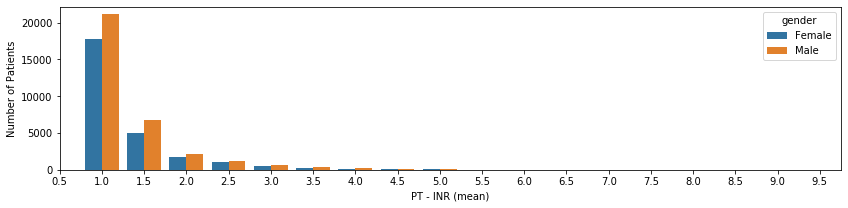

In [205]:
plt.figure(figsize=(14, 3))
sns.countplot(x='mean_ptinr',hue='gender',data=pts)
plt.xlim([0, 18.5])
plt.xlabel('PT - INR (mean)')
plt.ylabel('Number of Patients')
#plt.savefig('figures/1C-ptinr-dist.png', dpi=300, transparent=True, bbox_inches='tight')

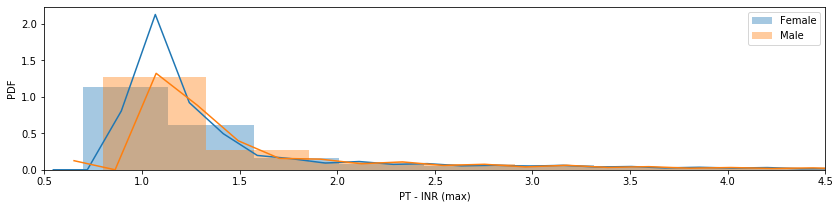

In [246]:
plt.figure(figsize=(14, 3))
sns.distplot(pts[(pts.gender == 'Female') & (pts.max_ptinr.notnull())]['max_ptinr'], norm_hist=True)
sns.distplot(pts[(pts.gender == 'Male') & (pts.max_ptinr.notnull())]['max_ptinr'], norm_hist=True)
plt.legend(['Female', 'Male'])
plt.xlim([0.5, 4.5])
plt.xlabel('PT - INR (max)')
plt.ylabel('PDF')
#plt.savefig('figures/1C-ptinr-dist.png', dpi=300, transparent=True, bbox_inches='tight')

Text(0, 0.5, 'Mortality Rate')

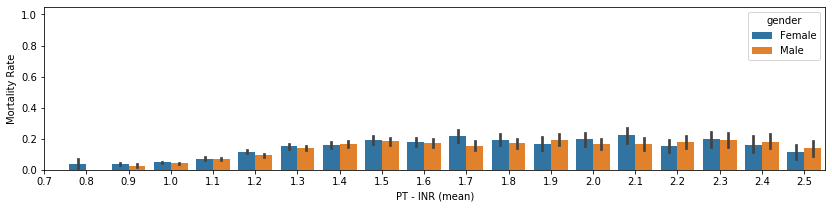

In [247]:
plt.figure(figsize=(14, 3))
sns.barplot(x='mean_ptinr',y='deceased',hue='gender',data=pts)
plt.xlim([0, 18.5])
plt.xlabel('PT - INR (mean)')
plt.ylabel('Mortality Rate')
#plt.savefig('figures/1B-ptinr-mortality.png', dpi=300, transparent=True, bbox_inches='tight')

In [270]:
pts['cond'] = (pts.iloc[:, 30:34] == 1).idxmax(1)

In [271]:
pts_none = pts[pts.cond != 'none']

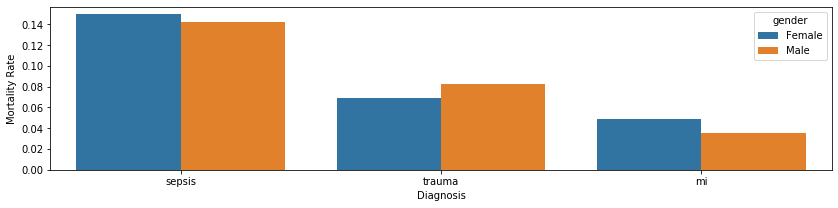

In [274]:
plt.figure(figsize=(14, 3))
sns.barplot(x='cond',y='deceased',hue='gender',hue_order=['Female', 'Male'],data=pts_none, estimator = np.mean, ci=None)
plt.xlabel('Diagnosis')
plt.ylabel('Mortality Rate')
#plt.savefig('figures/1A-trauma-sepsis-mi.png', dpi=300, transparent=True, bbox_inches='tight')

___
#### Trauma Analysis

In [135]:
pts = pd.read_csv('eicu-collaborative-research-database-2.0/patient.csv.gz')
dxs = pd.read_csv('eicu-collaborative-research-database-2.0/diagnosis.csv.gz')
hos = pd.read_csv('eicu-collaborative-research-database-2.0/hospital.csv.gz')
lab = pd.read_csv('eicu-collaborative-research-database-2.0/lab.csv.gz')

In [136]:
pts = pts[pts.gender != 'Unknown']
pts = pts[pts.gender != 'Other']
pts = pts[pts.unitadmitsource == 'Emergency Department']
pts = pd.merge(pts, hos, on=['hospitalid'], how = 'left')

In [137]:
def age (x):
    if x == '> 89':
        return 90
    else:
        return int(x)

In [138]:
pts['hospitaladmitsource'].fillna(value = 'Unknown', inplace = True)

pts['age'].fillna(value = 0, inplace = True)
pts['age'] = pts['age'].apply(lambda x: age(x))

In [139]:
pts = pts[pts['apacheadmissiondx'].str.contains('trauma', case = False).fillna(False)]

In [140]:
# adding icd9 codes
dxs = dxs.drop(columns=['diagnosisid', 'activeupondischarge', 'diagnosisoffset', 'diagnosisstring'])
dxs.dropna(inplace=True)

# merge
dxs = dxs.groupby('patientunitstayid')['icd9code'].apply(list).reset_index(name='icd9codes')
pts = pd.merge(pts, dxs, on=['patientunitstayid'], how='left')

In [141]:
pts = pts.drop(columns=['hospitaladmittime24', 'hospitaldischargeyear', 'hospitaldischargetime24',
                       'unitadmittime24', 'dischargeweight', 'unitdischargetime24', 'patienthealthsystemstayid'])

In [142]:
lab.drop(columns=['labresultoffset', 'labtypeid', 'labresulttext', 'labresultrevisedoffset', 'labid'], inplace = True)

In [143]:
def lab_val (x, arr):
    try:
        return round(arr['labresult'][x], 1)
    except:
        return 0

In [144]:
# labs = ['PT - INR', 'lactate', 'platelets x 1000', 'WBC x 1000', 'Hgb', 'potassium', 'Hct', 'sodium']
labs = list(lab.labname.unique())

for i in labs:
    lab_df = lab[lab.labname == i].groupby('patientunitstayid').mean()
    pts[i] = pts['patientunitstayid'].apply(lambda x: lab_val(x, lab_df))

In [145]:
missinglabs = ['fibrinogen', 'PT - INR',
       'PT', 'pH', 'BUN', 'urinary sodium', 'lactate', 'CPK', 'PTT', 'FiO2',
       'Base Deficit', 'troponin - I', 'paO2', 'platelets x 1000', 'LPM O2',
       'paCO2', 'RBC', 'bicarbonate', 'CPK-MB', 'total bilirubin', '-basos',
       'phosphate', 'ALT (SGPT)', 'AST (SGOT)', 'total protein', 'salicylate',
       'Acetaminophen', 'ethanol', "WBC's in urine",
       'urinary specific gravity', 'direct bilirubin', 'Base Excess', 'folate',
       'ammonia', 'TSH', 'Vitamin B12', 'HDL', 'Carboxyhemoglobin',
       'O2 Sat (%)', 'Methemoglobin', 'TIBC', 'Vancomycin - trough',
       'prealbumin', 'lipase', 'CRP', 'LDH', 'Vancomycin - random',
       'protein S', 'Digoxin', 'protein C', 'free T4', 'protein - CSF',
       'haptoglobin', 'urinary osmolality', 'serum osmolality',
       '24 h urine urea nitrogen', 'amylase', 'myoglobin', 'cortisol',
       'Phenytoin', 'Phenobarbital', '24 h urine protein',
       'Gentamicin - random', 'Lithium', 'T3', 'Vent Rate', 'Carbamazepine',
       'Tobramycin - trough', 'T3RU', 'CPK-MB INDEX', 'Temperature', 'TV',
       'troponin - T', 'Pressure Support', 'Mode', 'Spontaneous Rate', 'Site',
       'O2 Content', 'cd 4', "WBC's in peritoneal fluid", 'HSV 1&2 IgG AB']

In [146]:
pts[missinglabs] = pts[missinglabs].fillna(value=0)

In [147]:
pts['admissionheight'] = pts['admissionheight'].fillna(value=pts.admissionheight.median())
pts['admissionweight'] = pts['admissionweight'].fillna(value=pts.admissionweight.median())

In [148]:
for x in list(pts.columns[pts.isnull().any()]):
    print (x, ":", pts[x].isnull().sum())

gender : 1
ethnicity : 60
hospitaldischargelocation : 67
hospitaldischargestatus : 62
unitdischargelocation : 3
numbedscategory : 391
region : 264
icd9codes : 350


In [149]:
pts.icd9codes = pts.icd9codes.fillna(value='None')

def icd_list(x):
    if type(x) == list:
        return x
    else:
        return [x]

pts.icd9codes = pts.icd9codes.apply(lambda x: icd_list(x))

In [150]:
pts.dropna(inplace = True)

In [151]:
pts['deceased'] = (pts.hospitaldischargestatus == 'Expired') | (pts.unitdischargestatus == 'Expired')
pts.drop(columns=['hospitaldischargestatus', 'unitdischargestatus'], inplace = True)

In [152]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

# one hot ecoding

pts = pts.join(pd.DataFrame(mlb.fit_transform(pts.pop('icd9codes')), columns=mlb.classes_, index=pts.index))

In [153]:
pts_old= pts

In [23]:
cat_cols = ['gender', 'ethnicity','hospitalid','wardid','apacheadmissiondx','hospitaladmitsource','unittype',
            'unitadmitsource','unitvisitnumber','unitstaytype', 'numbedscategory','teachingstatus','region']

pts = pd.get_dummies(pts, columns = cat_cols, drop_first = False)

In [66]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier


X = pts.drop(columns=['unitdischargelocation', 'uniquepid', 'patientunitstayid','deceased', 'hospitaldischargelocation'])
y = pts.deceased

In [67]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [69]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
n_estimators = [16, 32, 64, 100, 200, 300, 500, 1000]
train_results = []
test_results = []

for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
#plt.savefig('figures/estimators.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []

for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
#plt.savefig('figures/learningrate.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
max_depths = np.linspace(1, 16, 16, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    model = GradientBoostingClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
#plt.savefig('figures/treedepth.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

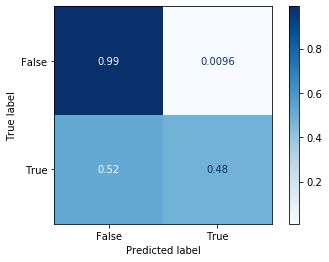

In [41]:
gb_clf2 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.25, max_depth=5, random_state=0)
gb_clf2.fit(X_train, y_train)

y_pred = gb_clf2.predict(X_test)

metrics.plot_confusion_matrix(gb_clf2, X_test, y_test, cmap=plt.cm.Blues, normalize = 'true')
plt.savefig('figures/confusion_matrix_trauma.png', dpi=300, transparent=True, bbox_inches='tight')

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.99      0.98      1248
        True       0.78      0.48      0.59        90

    accuracy                           0.96      1338
   macro avg       0.87      0.73      0.78      1338
weighted avg       0.95      0.96      0.95      1338



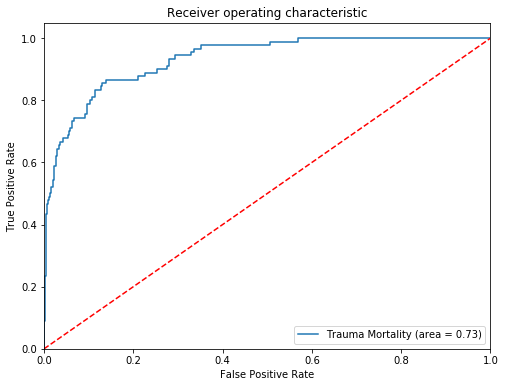

In [31]:
roc_auc = roc_auc_score(y_test, gb_clf2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb_clf2.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Trauma Mortality (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('figures/3A-ROC-trauma.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [32]:
import shap

shap_values = shap.TreeExplainer(gb_clf2).shap_values(X_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.


In [124]:
X = pts.drop(columns=['unitdischargelocation', 'uniquepid', 'patientunitstayid','deceased', 'hospitaldischargelocation'])
y = pts.deceased

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [130]:
d = pd.DataFrame(X_test)
d['truth'] = y_test
d['pred'] = y_pred

trues=d[(d.truth == False) & (d.pred == True)]

In [160]:
X = pts_old.drop(columns=['unitdischargelocation', 'uniquepid', 'deceased', 'hospitaldischargelocation'])
y = pts_old.deceased

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

d = pd.DataFrame(X_test)
d['truth'] = y_test
d['pred'] = y_pred

In [161]:
d.iloc[830]

patientunitstayid      1118313
gender                  Female
age                         89
ethnicity            Caucasian
hospitalid                 199
                       ...    
V08, Z21                     0
V42.7, Z94.4                 0
V62.84, R45.851              0
truth                    False
pred                      True
Name: 1021, Length: 725, dtype: object

In [156]:
dict(d.iloc[830])

{'gender': 'Female',
 'age': 89,
 'ethnicity': 'Caucasian',
 'hospitalid': 199,
 'wardid': 487,
 'apacheadmissiondx': 'Head/extremity trauma',
 'admissionheight': 160.0,
 'hospitaladmitoffset': -85,
 'hospitaladmitsource': 'Emergency Department',
 'hospitaldischargeoffset': 24299,
 'unittype': 'MICU',
 'unitadmitsource': 'Emergency Department',
 'unitvisitnumber': 1,
 'unitstaytype': 'admit',
 'admissionweight': 63.9,
 'unitdischargeoffset': 0,
 'numbedscategory': '>= 500',
 'teachingstatus': 't',
 'region': 'Northeast',
 'fibrinogen': 0.0,
 'PT - INR': 1.5,
 'magnesium': 0.0,
 'PT': 17.4,
 'pH': 0.0,
 'urinary creatinine': 0.0,
 'MCH': 0.0,
 'BUN': 0.0,
 'urinary sodium': 0.0,
 'HCO3': 0.0,
 'lactate': 0.0,
 'CPK': 0.0,
 'PTT': 33.0,
 'FiO2': 0.0,
 '-lymphs': 0.0,
 'Base Deficit': 0.0,
 'BNP': 0.0,
 'chloride': 0.0,
 'uric acid': 0.0,
 'troponin - I': 0.0,
 'paO2': 0.0,
 '-eos': 0.0,
 'platelets x 1000': 0.0,
 'anion gap': 0.0,
 'LPM O2': 0.0,
 'MCV': 0.0,
 'paCO2': 0.0,
 'RBC': 0.0,


In [163]:
pts[pts.patientunitstayid == 1118313]

,patientunitstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeoffset,hospitaldischargelocation,unittype,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,unitdischargeoffset,unitdischargelocation,uniquepid,numbedscategory,teachingstatus,region,fibrinogen,PT - INR,magnesium,PT,pH,urinary creatinine,MCH,BUN,urinary sodium,HCO3,lactate,CPK,PTT,FiO2,-lymphs,Base Deficit,BNP,chloride,uric acid,troponin - I,paO2,-eos,platelets x 1000,anion gap,LPM O2,MCV,paCO2,RBC,RDW,MCHC,alkaline phos.,WBC x 1000,creatinine,calcium,Hgb,bicarbonate,potassium,-polys,-monos,CPK-MB,total bilirubin,-basos,phosphate,ALT (SGPT),Hct,AST (SGOT),glucose,total protein,sodium,albumin,salicylate,Acetaminophen,ethanol,WBC's in urine,bedside glucose,urinary specific gravity,direct bilirubin,Total CO2,Base Excess,folate,ammonia,TSH,Vitamin B12,-bands,LDL,total cholesterol,HDL,triglycerides,Carboxyhemoglobin,O2 Sat (%),Methemoglobin,ionized calcium,TIBC,Vancomycin - trough,Fe/TIBC Ratio,Fe,prealbumin,lipase,CRP,ESR,LDH,Vancomycin - random,Tacrolimus-FK506,protein S,Digoxin,protein C,CRP-hs,Respiratory Rate,free T4,WBC's in cerebrospinal fluid,protein - CSF,glucose - CSF,haptoglobin,reticulocyte count,Ferritin,WBC's in synovial fluid,urinary osmolality,serum osmolality,transferrin,24 h urine urea nitrogen,amylase,myoglobin,cortisol,Phenytoin,prolactin,Phenobarbital,Tobramycin - random,24 h urine protein,Theophylline,Gentamicin - random,Lidocaine,Lithium,T3,Gentamicin - peak,Cyclosporin,Vent Rate,Carbamazepine,Tobramycin - peak,Tobramycin - trough,T4,Gentamicin - trough,RPR titer,Legionella pneumophila Ab,T3RU,PEEP,CPK-MB INDEX,MPV,Temperature,TV,ANF/ANA,troponin - T,Pressure Support,WBC's in body fluid,Peak Airway/Pressure,Clostridium difficile toxin A+B,Mode,PTT ratio,Oxyhemoglobin,Spontaneous Rate,Device,WBC's in pleural fluid,Vancomycin - peak,Site,Pressure Control,serum ketones,O2 Content,cd 4,WBC's in peritoneal fluid,WBC's in pericardial fluid,Amikacin - trough,Amikacin - random,NAPA,Procainamide,Amikacin - peak,Vent Other,HSV 1&2 IgG AB titer,HIV 1&2 AB,HSV 1&2 IgG AB,deceased,"008.45, A04.7","009.1, A09","038.9, 348.31, R65.20, G93.41","038.9, 518.81, R65.20, J96.0","038.9, 570, R65.20, K72.0","038.9, 584.9, R65.20, N17","038.9, 785.52, R65.21","038.9, 996.62","038.9, A41.9","038.9, R78.81","042, B20","135, 517.8, D86.9","138, G14","151.9, C16.9","153.9, C18.9","154.3, C18.0","155.0, C22.0","157.9, C25.9","162.9, C34.90","174.9, C50.919","185, C61","188.9, C67.9","189.0, C64.9","191.9, C71.9","192.9, C15.9","197.0, C78.00","197.6, C78.6","197.7, C78.7","198.3, C79.31","198.5, C79.51","201.90, C81.90","204.10, C91.10","238.7, C94.6","242.20, E05.20","242.90, E05.90","244.8, E03.8","244.9, E03.9","250.00, E11.9","250.01, E10.9","250.02, E11.65","250.03, E10.65","250.13, E10.1","250.33, E10.11","251.1, E16.1","251.1, E16.2","253.4, E23.0","253.5, E23.2","255.4, E27.40","261, E41","263.0, E44.0","263.9, E46","272.4, E78.5","275.2, E83.41","275.2, E83.42","275.3, E83.30","275.41, E83.51","275.42, E83.52","276.0, E87.0","276.1, E87.0","276.1, E87.0, E87.1","276.1, E87.1","276.2, E87.2","276.3, E87.3","276.4, E87.4","276.50, E86.9","276.51, E86.0","276.52, E86.1","276.6, E87.70","276.7, E87.5","276.7, E87.8","276.8, E87.6","276.8, E87.8","276.9, E87.8","278.00, E66.9","278.01, E66.01","280.0, D50.0","282.60, D57.1","284.8, D61.9","284.9, D52.9","285.1, D62","285.21, D63.1","285.29, D63.8","285.9, D64.9","286.4, D68.0","286.5, D68.31","286.6, D65","286.7, D68.4","286.9, D68.32","286.9, D68.51","286.9, D68.69","286.9, D68.9","287.1, D69.1","287.31, D69.3","287.5, D69.6","288.0, D70.9","288.8, D72.820","288.8, D72.823","288.8, D72.829","288.9, D72.825","289.9, D47.3","291.81, F10.239","292.0, F19.939","293.0, F05","294.10, 331.0, F02.8, G30.9","294.9, F03","295.20, F20.2","295.90, F20.9","296.80, F31.9","300.00, F41.9","308.2, F43.0",31.1,"311, F32.9","322.9, G03.9","332

`patientunitstayid      1118313` 
 
 'gender': 'Female',
 'age': 89,
 'ethnicity': 'Caucasian',
 'hospitalid': 199,
 'wardid': 487,
 'apacheadmissiondx': 'Head/extremity trauma',
 'icd9 code' : 852.20, S06.5,
 'admissionheight': 160.0,
 'hospitaladmitsource': 'Emergency Department',
 'hospitaldischargeoffset': 24299,
 'unittype': 'MICU',
 'unitadmitsource': 'Emergency Department',
 'admissionweight': 63.9,
 'region': 'Northeast',
 'PT - INR': 1.5,
 'PT': 17.4,
 `Prediction: Dead | Truth: Not Dead`
 
 'gender': 'Male',
 'age': 89,
 'ethnicity': 'Caucasian',
 'hospitalid': 199,
 'wardid': 487,
 'apacheadmissiondx': 'Head/extremity trauma',
 'admissionheight': 160.0,
 'hospitaladmitsource': 'Emergency Department',
 'hospitaldischargeoffset': 24299,
 'unittype': 'MICU',
 'unitadmitsource': 'Emergency Department',
 'admissionweight': 63.9,
 'unitdischargeoffset': 0,
 'numbedscategory': '>= 500',
 'teachingstatus': 't',
 'region': 'Northeast',
 'PT - INR': 1.5,
 'PT': 17.4,
 `Prediction: Not Dead | Truth: Not Dead`

In [ ]:
for person in list(trues.index):
    for x, i in enumerate(d.index):
        if i == person:
            idx = x
    
    k = X_test[idx]
    
    if k[709] == 0: # male to female
        k[709]= 1.0
        k[710]= 0
    else: #female to male
        k[709]= 0
        k[710]= 1.0
        
    if gb_clf2.predict([k]) == False:
        print(idx)

In [134]:
for x, i in enumerate(d.index):
    if i == 1021:
        print (x)

830


In [85]:
d.columns.get_loc("gender_Female")

709

In [117]:
k = X_test[830]
k

array([0.98823529, 0.77598039, 0.74179752, ..., 1.        , 0.        ,
       0.        ])

In [157]:
print(k[709],k[710])

0.0 1.0


In [158]:
k[709]= 1.0
k[710]= 0

In [159]:
gb_clf2.predict([k])

array([ True])

In [34]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_train.columns, vals)), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance.head()

,col_name,feature_importance_vals
0,age,0.849972
3,hospitaldischargeoffset,0.800465
52,glucose,0.620999
19,FiO2,0.367195
26,paO2,0.329275


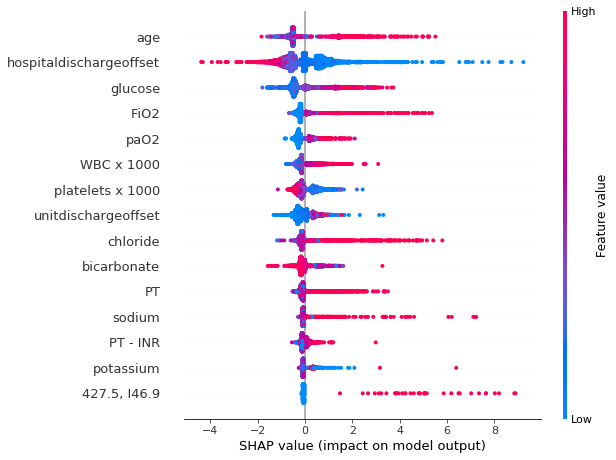

In [35]:
shap.summary_plot(shap_values, X_train, show=False, max_display=15)
plt.savefig('figures/3B-SHAPscoretrauma.png', dpi=300, transparent=True, bbox_inches='tight')

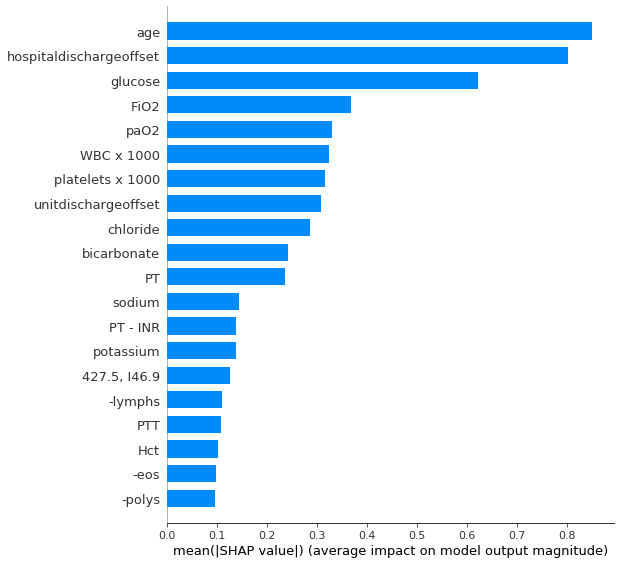

In [36]:
shap.summary_plot(shap_values, X_train, plot_type='bar')